# Pandas Test - Real life exercise
## TCDS17 Gil LAIFER (028482636)

In [1]:
import pandas as pd
import numpy as np
import math

For visualizations:

In [2]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [3]:
ad_recs_annotated = pd.read_csv('data/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
182170,2021-week_45,AD07VKZ9CJ,RelayFoods,JP,no,True,Qality,DNNQ
327409,2022-week_04,AD088HQ8DY,Fancy,US,yes,NaN,Qality,DNNQ
13495,2021-week_33,AD008889DZ,Tab Solutions,US,yes,NaN,Qality,UserPopQ
263855,2021-week_51,AD07FFW8R9,MoJoe Brewing Company,GB,no,True,Yield,DNNY
337483,2022-week_05,AD08D6CZQK,RelayFoods,IN,yes,NaN,Qality,UserPopQ


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

* Add a column with the sample year
* Add a column with the sample quarter (google how to)
* Add a new success column with values 1 and 0 for yes and no 
* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**
* Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
* Capitlize (first letter only) the is_success column

Add a column with the sample year

In [4]:
ad_recs_annotated['Year'] = ad_recs_annotated['week_id'].str[:4].astype(int)
ad_recs_annotated['Week'] = ad_recs_annotated['week_id'].str[-2:].astype(int)

In [5]:
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,Week
30954,2021-week_35,AD08RGUAT6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,35
88834,2021-week_39,AD008HD0WE,Modanisa,GB,no,True,Yield,RuleBasedY,2021,39
241468,2021-week_49,AD077L8T7R,Fancy,US,yes,NaN,Qality,RNNQ,2021,49
364540,2022-week_52,AD088QGH8P,RelayFoods,IN,no,True,Qality,UserPopQ,2022,52
5761,2021-week_33,AD07GCPDWH,Search Million Culture,IN,no,False,Qality,UserPopQ,2021,33


Add a column with the sample quarter (google how to)

In [6]:
ad_recs_annotated['Quarter'] = ((ad_recs_annotated['Week']-1) // 13) + 1

Add a new success column with values 1 and 0 for yes and no

In [7]:
ad_recs_annotated['Success'] = ad_recs_annotated['is_success'].map(lambda s: 1 if s=='yes' else 0)

Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column (pay attention, this is not trivial at all)

In [8]:
ad_recs_annotated.duplicated().sum()

9644

In [9]:
ad_recs_annotated['ad_count'] = 1

In [10]:
col_list = ad_recs_annotated.columns.tolist()
col_list.remove('ad_count')

In [11]:
ad_recs_annotated = ad_recs_annotated.groupby(col_list, dropna=False).ad_count.count().reset_index()
ad_recs_annotated.head(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,Week,Quarter,Success,ad_count
0,2021-week_33,AD00000ADJ,Extreme DA,US,yes,NaN,Yield,BooksY,2021,33,3,1,1
1,2021-week_33,AD00000IV8,Search Million Culture,US,yes,NaN,Qality,DNNQ,2021,33,3,1,1
2,2021-week_33,AD00000IZK,Extreme DA,US,yes,NaN,Yield,RuleBasedY,2021,33,3,1,1
3,2021-week_33,AD000068FZ,Tab Solutions,US,yes,NaN,Qality,ManualQ,2021,33,3,1,1
4,2021-week_33,AD00006IDK,Extreme DA,US,yes,NaN,Yield,DNNY,2021,33,3,1,1


In [12]:
ad_recs_annotated.ad_count.value_counts()

1     358338
2       4560
3        686
4        210
5        107
6         48
7         44
9         21
8         20
11        19
10        18
12        14
14         8
20         7
15         6
13         6
19         4
28         4
24         2
21         2
25         2
34         2
17         2
22         2
31         1
69         1
45         1
29         1
30         1
38         1
57         1
44         1
49         1
35         1
56         1
18         1
Name: ad_count, dtype: int64

In [13]:
ad_recs_annotated.sample(5) 

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,Week,Quarter,Success,ad_count
107204,2021-week_40,AD089RZW8Q,Search Million Culture,GB,yes,NaN,Qality,DNNQ,2021,40,4,1,1
264775,2022-week_01,AD008J888J,Search Million Culture,DE,yes,NaN,Qality,UserPopQ,2022,1,1,1,1
18602,2021-week_34,AD07FLYLSW,MoJoe Brewing Company,GB,yes,NaN,Yield,RNNY,2021,34,3,1,1
2849,2021-week_33,AD00V87XU8,RelayFoods,US,yes,NaN,Qality,RNNQ,2021,33,3,1,1
248808,2021-week_50,AD08SYNSG9,Extreme DA,US,yes,NaN,Yield,DNNY,2021,50,4,1,1


Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs.

In [14]:
ad_recs_annotated['is_sever'].isnull().sum()

296238

In [15]:
ad_recs_annotated['is_sever_modified'] = ad_recs_annotated['is_sever'].fillna(False)
ad_recs_annotated['is_sever_modified'].isnull().sum()

0

Capitlize (first letter only) the is_success column

In [16]:
ad_recs_annotated['is_success'] = ad_recs_annotated['is_success'].apply(lambda x: x.capitalize())

In [17]:
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,Week,Quarter,Success,ad_count,is_sever_modified
58849,2021-week_37,AD00OH78V8,Fancy,GB,Yes,NaN,Qality,DNNQ,2021,37,3,1,1,False
261096,2021-week_51,AD08NVQZPQ,RelayFoods,IN,Yes,NaN,Qality,UserPopQ,2021,51,4,1,1,False
283882,2022-week_02,AD07SK8YF8,RelayFoods,IN,Yes,NaN,Qality,UserPopQ,2022,2,1,1,1,False
74369,2021-week_38,AD079JG7N8,Extreme DA,US,No,True,Yield,DNNY,2021,38,3,0,1,True
110673,2021-week_40,AD0977XHCX,Search Million Culture,JP,No,False,Qality,UserPopQ,2021,40,4,0,1,False


### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

1. How many requests are there in US region? 

In [18]:
ad_recs_annotated.query("region == 'US'").shape[0]

102262

In [19]:
(ad_recs_annotated['region'] == 'US').map({False: 0, True: 1}).sum() 

102262

2. How many successful requests are there in US region?

In [20]:
ad_recs_annotated.query("region == 'US' & is_success == 'Yes'").shape[0]

87488

In [21]:
ad_recs_annotated.loc[(ad_recs_annotated.region=='US') & (ad_recs_annotated.is_success=='Yes')].shape[0]

87488

3. How many successful requests are there in US region, on week 52?

In [22]:
ad_recs_annotated.query("region == 'US' & is_success == 'Yes' & Week == 52").shape[0]

3284

In [23]:
ad_recs_annotated.loc[(ad_recs_annotated.region=='US') & 
                      (ad_recs_annotated.is_success=='Yes') & 
                      (ad_recs_annotated.Week==52)].shape[0]

3284

4. How many requests where delivered by DNNQ, RNNY and UserPopQ together?

In [24]:
ad_recs_annotated.query("rec_provider == 'DNNQ' | rec_provider == 'RNNY' | rec_provider == 'UserPopQ'").shape[0]

196748

In [25]:
ad_recs_annotated.loc[(ad_recs_annotated.rec_provider == 'DNNQ') | 
                      (ad_recs_annotated.rec_provider == 'RNNY') | 
                      (ad_recs_annotated.rec_provider == 'UserPopQ')].shape[0]

196748

5. How many requests where delivered by rule based providers?

In [26]:
ad_recs_annotated.query('rec_provider.str.lower() in "rulebased"').shape[0]

182

In [27]:
ad_recs_annotated.loc[ad_recs_annotated['rec_provider'].str.lower()=="rulebased"].shape[0]

182

6. Select only the requests from 2021 - How many are there?

In [28]:
ad_recs_annotated.query('Year == 2021').shape[0]

263830

In [29]:
ad_recs_annotated.loc[ad_recs_annotated['Year'] == 2021].shape[0]

263830

7. Select the reqeusts from week 30 to week 40 - How many are there?

In [30]:
ad_recs_annotated.query('30 <= Week <= 40').shape[0]

112092

In [31]:
ad_recs_annotated.loc[ad_recs_annotated['Week'].between(30, 40)].shape[0]

112092

8. Select all the data that comes from the most popular Ad

In [32]:
ad_recs_annotated.query('ad_count.idxmax()')

week_id                        2021-week_47
ad_id                            AD08C8RR8J
requester              iDreamsky Technology
region                                   GB
is_success                              Yes
is_sever                                NaN
recommendation_type                  Qality
rec_provider                        ManualY
Year                                   2021
Week                                     47
Quarter                                   4
Success                                   1
ad_count                                 69
is_sever_modified                     False
Name: 204298, dtype: object

In [33]:
ad_recs_annotated.iloc[ad_recs_annotated['ad_count'].idxmax()]

week_id                        2021-week_47
ad_id                            AD08C8RR8J
requester              iDreamsky Technology
region                                   GB
is_success                              Yes
is_sever                                NaN
recommendation_type                  Qality
rec_provider                        ManualY
Year                                   2021
Week                                     47
Quarter                                   4
Success                                   1
ad_count                                 69
is_sever_modified                     False
Name: 204298, dtype: object

9. Select all the data that comes from the least popular provider

In [34]:
ad_recs_annotated.groupby('rec_provider', dropna=False).ad_count.count().reset_index().query('ad_count.idxmin()')

rec_provider    UserPopSelectionY
ad_count                       21
Name: 12, dtype: object

In [35]:
tmp_df = ad_recs_annotated.groupby('rec_provider', dropna=False).ad_count.count().reset_index()
tmp_df.iloc[tmp_df.ad_count.idxmin()]


rec_provider    UserPopSelectionY
ad_count                       21
Name: 12, dtype: object

10. Select the data in which is_sever is None. How big is it?

In [36]:
ad_recs_annotated.query('is_sever.isnull()', engine='python').shape[0]

296238

In [37]:
ad_recs_annotated.loc[ad_recs_annotated.is_sever.isnull()].shape[0]

296238

11. Select the data in which the requester is a 3 word company

In [38]:
ad_recs_annotated.query('requester.str.count(" ") == 2', engine='python')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,Week,Quarter,Success,ad_count,is_sever_modified
1,2021-week_33,AD00000IV8,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2021,33,3,1,1,False
6,2021-week_33,AD00006IF8,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2021,33,3,1,1,False
7,2021-week_33,AD00006J8G,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,3,1,1,False
8,2021-week_33,AD00006JCU,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,3,1,1,False
10,2021-week_33,AD000077CP,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2021,33,3,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364127,2022-week_52,AD89888888,MoJoe Brewing Company,GB,Yes,NaN,Yield,ManualQ,2022,52,4,1,1,False
364129,2022-week_52,AD89888978,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2022,52,4,1,1,False
364140,2022-week_52,AD98898698,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2022,52,4,1,1,False
364141,2022-week_52,AD98898880,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,52,4,1,1,False


In [39]:
ad_recs_annotated.loc[ad_recs_annotated.requester.str.count(" ") == 2]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,Week,Quarter,Success,ad_count,is_sever_modified
1,2021-week_33,AD00000IV8,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2021,33,3,1,1,False
6,2021-week_33,AD00006IF8,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2021,33,3,1,1,False
7,2021-week_33,AD00006J8G,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,3,1,1,False
8,2021-week_33,AD00006JCU,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,3,1,1,False
10,2021-week_33,AD000077CP,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2021,33,3,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364127,2022-week_52,AD89888888,MoJoe Brewing Company,GB,Yes,NaN,Yield,ManualQ,2022,52,4,1,1,False
364129,2022-week_52,AD89888978,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2022,52,4,1,1,False
364140,2022-week_52,AD98898698,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2022,52,4,1,1,False
364141,2022-week_52,AD98898880,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,52,4,1,1,False


12. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it

In [40]:
ad_recs_annotated.query('requester.str.count(" ") == 2 & ad_id.str.count("[a-zA-Z]") == 6', engine='python')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,Week,Quarter,Success,ad_count,is_sever_modified
25,2021-week_33,AD0000AIRX,Search Million Culture,GB,No,True,Qality,XGBQ,2021,33,3,0,1,True
36,2021-week_33,AD0000YTGG,MoJoe Brewing Company,JP,No,True,Yield,UserPopY,2021,33,3,0,1,True
57,2021-week_33,AD0007OEES,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,3,1,1,False
83,2021-week_33,AD0008EXYP,MoJoe Brewing Company,GB,Yes,NaN,Yield,DNNY,2021,33,3,1,1,False
84,2021-week_33,AD0008EXYR,MoJoe Brewing Company,GB,Yes,NaN,Yield,DNNY,2021,33,3,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363949,2022-week_52,AD09NL9TG,Search Million Culture,GB,Yes,NaN,Qality,RNNQ,2022,52,4,1,1,False
363980,2022-week_52,AD09R8N8PY,Search Million Culture,IN,Yes,NaN,Qality,UserPopQ,2022,52,4,1,1,False
363990,2022-week_52,AD09VG7VV6,Search Million Culture,DE,Yes,NaN,Qality,UserPopQ,2022,52,4,1,1,False
363991,2022-week_52,AD09VG8SN7,Search Million Culture,DE,No,True,Qality,UserPopQ,2022,52,4,0,1,True


In [41]:
ad_recs_annotated.loc[(ad_recs_annotated.requester.str.count(" ") == 2) & (ad_recs_annotated.ad_id.apply(lambda s: sum(c.isalpha() for c in s)) == 6)]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,Week,Quarter,Success,ad_count,is_sever_modified
25,2021-week_33,AD0000AIRX,Search Million Culture,GB,No,True,Qality,XGBQ,2021,33,3,0,1,True
36,2021-week_33,AD0000YTGG,MoJoe Brewing Company,JP,No,True,Yield,UserPopY,2021,33,3,0,1,True
57,2021-week_33,AD0007OEES,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,3,1,1,False
83,2021-week_33,AD0008EXYP,MoJoe Brewing Company,GB,Yes,NaN,Yield,DNNY,2021,33,3,1,1,False
84,2021-week_33,AD0008EXYR,MoJoe Brewing Company,GB,Yes,NaN,Yield,DNNY,2021,33,3,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363949,2022-week_52,AD09NL9TG,Search Million Culture,GB,Yes,NaN,Qality,RNNQ,2022,52,4,1,1,False
363980,2022-week_52,AD09R8N8PY,Search Million Culture,IN,Yes,NaN,Qality,UserPopQ,2022,52,4,1,1,False
363990,2022-week_52,AD09VG7VV6,Search Million Culture,DE,Yes,NaN,Qality,UserPopQ,2022,52,4,1,1,False
363991,2022-week_52,AD09VG8SN7,Search Million Culture,DE,No,True,Qality,UserPopQ,2022,52,4,0,1,True


13. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

In [42]:
def my_func(s):
    result = 1
    for c in s:
        if c.isdigit():
            result = result * int(c)
    return result

In [43]:
ad_recs_annotated.query('requester.str.count(" ") == 2  & ad_id.apply(@my_func) > 30', engine='python').shape

(945, 14)

In [44]:
ad_recs_annotated.loc[(ad_recs_annotated.requester.str.count(" ") == 2) &
                      (ad_recs_annotated.ad_id.apply(my_func) > 30)].shape

(945, 14)

### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

1. How many weeks available in the data? Are there any missing weeks? 

In [45]:
ad_recs_annotated.groupby(['Week', 'Year']).Week.count()

Week  Year
1     2022    14157
2     2022    14216
3     2022    14103
4     2022    14087
5     2022    14072
6     2022    13994
33    2021    14037
34    2021    14110
35    2021    14079
36    2021    14096
37    2021    14118
38    2021    14040
39    2021    13969
40    2021    13643
41    2021    13810
42    2021    13986
43    2021    13920
44    2021    14016
45    2021    14179
46    2021    13739
47    2021    13362
48    2021    14026
49    2021    14059
50    2021    14113
51    2021    12528
52    2022    15685
Name: Week, dtype: int64

There are 26 weeks in total (from week 33 in 2021 to week 6 of 2022). The week 52/2022 seems a mistake and should be infact 52/2021.

2. How many regions available in the data? Are there any missing weeks per region?

In [46]:
ad_recs_annotated.groupby(['region', 'Week', 'Year']).count().reset_index().groupby('region').region.count()

region
DE    26
GB    26
IN    26
JP    25
US    26
Name: region, dtype: int64

There are 5 regions (DE, GB, IN, JP, US). There are 26 weeks for each region except JP which has 25 weeks.

3. How many ads are being sent to annotation in each region per week?

In [47]:
ad_recs_annotated.groupby(['region', 'Week', 'Year']).ad_count.count().reset_index()

,region,Week,Year,ad_count
0,DE,1,2022,2374
1,DE,2,2022,2375
2,DE,3,2022,2357
3,DE,4,2022,2338
4,DE,5,2022,2374
...,...,...,...,...
124,US,48,2021,3940
125,US,49,2021,3886
126,US,50,2021,3869
127,US,51,2021,3933


4. How many None values are there in is_sever column?

In [48]:
ad_recs_annotated.is_sever.isna().sum()

296238

5. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)

In [49]:
print('Ads being sent more than one time in a given week:')
df = pd.DataFrame(ad_recs_annotated.groupby(['Week', 'Year', 'ad_id']).ad_count.sum().reset_index())
df.loc[df.ad_count > 1]

Ads being sent more than one time in a given week:


,Week,Year,ad_id,ad_count
0,1,2022,AD000068FZ,2
29,1,2022,AD0000C78C,2
37,1,2022,AD000688KC,2
53,1,2022,AD00087EGI,2
58,1,2022,AD000888DY,2
...,...,...,...,...
358700,52,2022,AD88868888,2
358708,52,2022,AD88886888,2
358719,52,2022,AD88888877,2
358721,52,2022,AD88888888,3


In [50]:
print('The ad that was sent the most in a given week:')
df = ad_recs_annotated.groupby(['Week', 'Year', 'ad_id']).ad_count.sum()
df = df.reset_index()
df.iloc[df.groupby(['Week','Year']).ad_count.idxmax()]
#ad_recs_annotated.iloc[ad_recs_annotated.groupby(['Week', 'Year']).ad_count.idxmax()]

The ad that was sent the most in a given week:


,Week,Year,ad_id,ad_count
13468,1,2022,AD09H7HKVL,10
26258,2,2022,AD0986H87S,26
33564,3,2022,AD07PFFMP9,15
55423,4,2022,AD09KZ6TNY,11
65956,5,2022,AD08LRDT7P,17
83125,6,2022,AD09KZ6TNY,18
88402,33,2021,AD07FM8DDG,8
101415,34,2021,AD079Q9D7,6
117870,35,2021,AD07TTH8TM,7
133387,36,2021,AD088J88G6,15


6. Are there ads that are being sent in more than one week?

In [51]:
df = pd.DataFrame(ad_recs_annotated.groupby('ad_id').week_id.count()).reset_index()
ads_sent_in_more_than_one_week = df[df.week_id >1].shape[0]
print(f'Yes, there are {ads_sent_in_more_than_one_week} ads that are being sent in more than one week:')
df = df[df.week_id >1]
df

Yes, there are 32069 ads that are being sent in more than one week:


,ad_id,week_id
3,AD00000888,2
12,AD00000DMF,2
15,AD00000ISC,2
17,AD00000IV8,2
21,AD00000IZK,2
...,...,...
300711,AD98908668,11
300717,AD98908888,2
300720,AD98908988,3
300724,AD98988898,2


A. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)

In [52]:
ad_id_idx = df[df.week_id >1].week_id.idxmax()
ad_id = df.loc[ad_id_idx][0]
num_of_weeks = df.loc[ad_id_idx][1]
print(f'The ad was sent in highest number of weeks is: {ad_id}. It was sent in {num_of_weeks} different weeks')

The ad was sent in highest number of weeks is: AD07PFFMP9. It was sent in 89 different weeks


B. What are the weeks that the ad from above was sent in?

In [53]:
#list(ad_recs_annotated.query('ad_id == @ad_id')[['Year', 'Week']].to_records(index=False))
ad_recs_annotated.query('ad_id == @ad_id')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,Week,Quarter,Success,ad_count,is_sever_modified
6016,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,33,3,1,2,False
19808,2021-week_34,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,34,3,1,1,False
19809,2021-week_34,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,34,3,1,1,False
34080,2021-week_35,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,35,3,1,2,False
34081,2021-week_35,AD07PFFMP9,iDreamsky Technology,IN,Yes,NaN,Qality,ManualQ,2021,35,3,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339915,2022-week_06,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2022,6,1,1,1,False
355000,2022-week_52,AD07PFFMP9,Allthetopbananas.com,IN,Yes,NaN,Qality,ManualQ,2022,52,4,1,1,False
355001,2022-week_52,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2022,52,4,1,2,False
355002,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,52,4,1,12,False


C. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.

In [54]:
print('Yes, all the ads list below were successful in one week but not successful in a different week:')
df = ad_recs_annotated.groupby(['ad_id', 'week_id']).Success.agg(['nunique'])
df = pd.DataFrame(df)
df.query('nunique > 1')

Yes, all the ads list below were successful in one week but not successful in a different week:


nunique
ad_id      week_id              
AD0008E8O8 2021-week_40        2
AD000F8AVP 2022-week_01        2
AD000FI8ER 2021-week_43        2
AD000IWW8G 2021-week_35        2
           2021-week_36        2
...                          ...
AD88897888 2021-week_44        2
AD88986988 2021-week_36        2
AD88988888 2021-week_34        2
AD89787888 2021-week_34        2
AD98898880 2021-week_49        2

[518 rows x 1 columns]

In [55]:
print('Example for such an ad is ad_id AD000F8AVP which was successful in all weeks but not successful in week 2022-week_01:')
ad_recs_annotated.query('ad_id == "AD000F8AVP"')

Example for such an ad is ad_id AD000F8AVP which was successful in all weeks but not successful in week 2022-week_01:


,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,Week,Quarter,Success,ad_count,is_sever_modified
14163,2021-week_34,AD000F8AVP,SOLOMO365,GB,Yes,NaN,Qality,RNNQ,2021,34,3,1,1,False
56446,2021-week_37,AD000F8AVP,Search Million Culture,GB,Yes,NaN,Qality,RNNQ,2021,37,3,1,1,False
209231,2021-week_48,AD000F8AVP,Fancy,US,Yes,NaN,Qality,ManualQ,2021,48,4,1,1,False
209232,2021-week_48,AD000F8AVP,Fancy,US,Yes,NaN,Qality,RNNQ,2021,48,4,1,2,False
209233,2021-week_48,AD000F8AVP,Search Million Culture,GB,Yes,NaN,Qality,RNNQ,2021,48,4,1,1,False
263959,2022-week_01,AD000F8AVP,Fancy,US,Yes,NaN,Qality,ManualQ,2022,1,1,1,1,False
263960,2022-week_01,AD000F8AVP,Search Million Culture,GB,No,True,Qality,DNNQ,2022,1,1,0,1,True
320497,2022-week_05,AD000F8AVP,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2022,5,1,1,1,False


7. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place?

In [56]:
print('When is_sever is None, the number of successful requests is:')
ad_recs_annotated.loc[ad_recs_annotated.is_sever.isna()].query('Success==1').shape[0]

When is_sever is None, the number of successful requests is:


296232

In [57]:
print('When is_sever is None, the number of non-successful requests is:')
ad_recs_annotated.loc[ad_recs_annotated.is_sever.isna()].query('Success==0').shape[0]

When is_sever is None, the number of non-successful requests is:


6

8. Per each region, What is the Quality/Yield traffic proportion WoW?

In [58]:
def calc_Qality_to_Yield_rate(grp):
    Qality_to_Yield_rate = len(grp[grp.recommendation_type == 'Qality']) / len(grp[grp.recommendation_type == 'Yield'])
    return pd.Series({'Qality_to_Yield_rate': Qality_to_Yield_rate})

In [59]:
ad_recs_annotated.groupby('week_id').apply(calc_Qality_to_Yield_rate).reset_index()
#ad_recs_annotated.groupby('week_id').recommendation_type.value_counts()


,week_id,Qality_to_Yield_rate
0,2021-week_33,2.284277
1,2021-week_34,2.014313
2,2021-week_35,1.859842
3,2021-week_36,2.068350
4,2021-week_37,2.047270
5,2021-week_38,1.808000
6,2021-week_39,1.543981
7,2021-week_40,1.602136
8,2021-week_41,1.637510
9,2021-week_42,2.172148


9. How many different reqeusters are there?

In [60]:
num_of_requesters = ad_recs_annotated.requester.nunique()
print(f'There are {num_of_requesters} requesters')

There are 36 requesters


10. Which are the top 5 requesters per region?

In [61]:
def top_5_requesters_per_region(grp):
    top_5_requesters_per_region = grp.groupby('requester').ad_count.agg('count').to_frame().sort_values(by=['ad_count'], ascending=False)
    return top_5_requesters_per_region.head(5)

In [62]:
ad_recs_annotated.groupby(['region']).apply(top_5_requesters_per_region).reset_index()

,region,requester,ad_count
0,DE,Search Million Culture,23366
1,DE,RelayFoods,17301
2,DE,MoJoe Brewing Company,8567
3,DE,iDreamsky Technology,2841
4,DE,SOLOMO365,2369
5,GB,Search Million Culture,27658
6,GB,RelayFoods,15910
7,GB,Fancy,12844
8,GB,MoJoe Brewing Company,9497
9,GB,SOLOMO365,3344


11. Which are the different rec_proivders?

In [63]:
ad_recs_annotated.rec_provider.unique()

array(['BooksY', 'DNNQ', 'RuleBasedY', 'ManualQ', 'DNNY', 'BooksQ',
       'RNNQ', 'RNNY', 'XGBQ', 'UserPopQ', 'UserPopY', 'XGBY', 'ManualY',
       'RuleBased', 'UserPopSelectionQ', 'UserPopSelectionY'],
      dtype=object)

12. Are there different rec providers per region?

In [64]:
print(f'Yes, there are different rec providers per region. The following table shows the different rec providers active in each region:')
ad_recs_annotated.groupby(['region', 'rec_provider']).rec_provider.size().to_frame().unstack()

Yes, there are different rec providers per region. The following table shows the different rec providers active in each region:


rec_provider                                                     \
rec_provider       BooksQ  BooksY     DNNQ     DNNY ManualQ ManualY     RNNQ   
region                                                                         
DE                 1310.0  1095.0  31906.0   5382.0   851.0   295.0      NaN   
GB                    NaN     NaN  38596.0   7226.0  1826.0   269.0  10957.0   
IN                    NaN     NaN      NaN      NaN  4598.0   184.0      NaN   
JP                    NaN     NaN  24440.0   3835.0   625.0    83.0      NaN   
US                  363.0  2822.0  20411.0  28433.0  4153.0   413.0   9420.0   

                                                                       \
rec_provider     RNNY RuleBased RuleBasedY UserPopQ UserPopSelectionQ   
region                                                                  
DE                NaN       NaN     1527.0  15018.0               NaN   
GB             1528.0      40.0     1483.0   6597.0               NaN   
IN                NaN       7.0    13754.0  37451.0               NaN   
JP                NaN       NaN      622.0   7847.0            2412.0   
US            11142.0     135.0     9890.0   1812.0               NaN   

                                                         
rec_provider UserPopSelectionY UserPopY    XGBQ    XGBY  
region                                                   
DE                         NaN   3339.0     NaN     NaN  
GB                         NaN   1624.0  8871.0   961.0  
IN                         NaN  23933.0     NaN     NaN  
JP                        21.0   1369.0     NaN     NaN  
US                         NaN   6896.0  3080.0  3292.0

13. Are there different rec providers per rec type?

In [65]:
print(f'Yes, there are different rec providers per recommendation_type.')
print(f'The following table shows the different rec providers per recommendation_type. Two rec providers provide both recommendation_types:')
ad_recs_annotated.groupby(['recommendation_type', 'rec_provider']).rec_provider.size().to_frame().unstack()

Yes, there are different rec providers per recommendation_type.
The following table shows the different rec providers per recommendation_type. Two rec providers provide both recommendation_types:


rec_provider                                             \
rec_provider              BooksQ  BooksY      DNNQ     DNNY ManualQ ManualY   
recommendation_type                                                           
Qality                    1673.0     NaN  115353.0      NaN  8842.0   793.0   
Yield                        NaN  3917.0       NaN  44876.0  3211.0   451.0   

                                                                     \
rec_provider            RNNQ     RNNY RuleBased RuleBasedY UserPopQ   
recommendation_type                                                   
Qality               20377.0      NaN     182.0        NaN  68725.0   
Yield                    NaN  12670.0       NaN    27276.0      NaN   

                                                                           \
rec_provider        UserPopSelectionQ UserPopSelectionY UserPopY     XGBQ   
recommendation_type                                                         
Qality                         2412.0               NaN      NaN  11951.0   
Yield                             NaN              21.0  37161.0      NaN   

                             
rec_provider           XGBY  
recommendation_type          
Qality                  NaN  
Yield                4253.0

14. What are the notation rules distinguishing between quality vs yielding providers?

In [66]:
print('Mostly, rec_provider names ending with "Q" are Quality providers while ending with "Y" are Yield providers:')
ad_recs_annotated.groupby(['recommendation_type', 'rec_provider']).rec_provider.size()

Mostly, rec_provider names ending with "Q" are Quality providers while ending with "Y" are Yield providers:


recommendation_type  rec_provider     
Qality               BooksQ                 1673
                     DNNQ                 115353
                     ManualQ                8842
                     ManualY                 793
                     RNNQ                  20377
                     RuleBased               182
                     UserPopQ              68725
                     UserPopSelectionQ      2412
                     XGBQ                  11951
Yield                BooksY                 3917
                     DNNY                  44876
                     ManualQ                3211
                     ManualY                 451
                     RNNY                  12670
                     RuleBasedY            27276
                     UserPopSelectionY        21
                     UserPopY              37161
                     XGBY                   4253
Name: rec_provider, dtype: int64

15. Which is the most successful region of operation?

In [67]:
def calc_success_metrics(grp):
    success_rate = len(grp[grp.is_success == 'Yes']) / len(grp)
    num_of_success = len(grp[grp.is_success == 'Yes'])
    num_of_no_success = len(grp[grp.is_success == 'No'])
    return pd.Series({'success_rate': success_rate,
                    'num_of_success': num_of_success,
                     'num_of_no_success': num_of_no_success})    

In [68]:
df = pd.DataFrame(ad_recs_annotated.groupby(['region']).apply(calc_success_metrics))    
df = df.sort_values(by='success_rate', ascending=False)
print(df)
most_successful_region = df.head(1).index[0]
print(f'\nThe most successful region of operations is {most_successful_region} who scores the highest success rate')

        success_rate  num_of_success  num_of_no_success
region                                                 
US          0.855528         87488.0            14774.0
GB          0.838231         67040.0            12938.0
DE          0.812905         49362.0            11361.0
JP          0.764023         31519.0             9735.0
IN          0.761170         60838.0            19089.0

The most successful region of operations is US who scores the highest success rate


16. Which is the most successful rec provider per each region?

In [69]:
df = pd.DataFrame(ad_recs_annotated.groupby(['region', 'rec_provider']).apply(calc_success_metrics))    
df = df.sort_values(by=['region','success_rate'], ascending=False)
#print(df)
print(f'The most successful rec provider per each region are:')
df = pd.DataFrame(pd.DataFrame(df.groupby('region').success_rate.idxmax()).reset_index().success_rate.tolist())
df.columns = ['region', 'most_successful_rec_provider']
df

The most successful rec provider per each region are:


,region,most_successful_rec_provider
0,DE,ManualY
1,GB,RuleBased
2,IN,ManualQ
3,JP,ManualQ
4,US,BooksY


21. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region

In [70]:
def calc_metrics(grp):
    
    success_rate_stats = grp.Success.agg(['mean', 'count', 'std'])
    ci95_hi = []
    ci95_lo = []
    #for i in success_rate_stats.index:
        #m, c, s = success_rate_stats.loc[i]
    m = success_rate_stats[0]
    c = success_rate_stats[1]
    s = success_rate_stats[2]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    success_rate_stats['ci95_hi'] = ci95_hi
    success_rate_stats['ci95_lo'] = ci95_lo

    sever_defects_rate_stats = grp.is_sever_modified.agg(['mean', 'count', 'std'])
    ci95_hi = []
    ci95_lo = []
    m = sever_defects_rate_stats[0]
    c = sever_defects_rate_stats[1]
    s = sever_defects_rate_stats[2]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    sever_defects_rate_stats['ci95_hi'] = ci95_hi
    sever_defects_rate_stats['ci95_lo'] = ci95_lo
    
    return pd.Series({'success_rate': success_rate_stats[0],
                      'success_rate_ci95_low': success_rate_stats['ci95_lo'],
                      'success_rate_ci95_hi': success_rate_stats['ci95_hi'],
                      'sever_defects_rate': sever_defects_rate_stats[0],
                      'sever_defects_rate_ci95_low': sever_defects_rate_stats['ci95_lo'],
                      'sever_defects_rate_ci95_hi': sever_defects_rate_stats['ci95_hi'],
                     })    


In [71]:
ad_recs_annotated.groupby(['recommendation_type', 'region']).apply(calc_metrics)

success_rate success_rate_ci95_low  \
recommendation_type region                                       
Qality              DE          0.805528  [0.8020297461537124]   
                    GB          0.848715  [0.8459993873278674]   
                    IN          0.804018   [0.800114340488601]   
                    JP          0.777535  [0.7731880143281515]   
                    US          0.898539  [0.8955565131578309]   
Yield               DE          0.844277  [0.8376667008465993]   
                    GB          0.784661  [0.7776193400870616]   
                    IN          0.718844   [0.714449728578849]   
                    JP          0.685855  [0.6741865992379592]   
                    US          0.828609  [0.8256634850059461]   

                            success_rate_ci95_hi  sever_defects_rate  \
recommendation_type region                                             
Qality              DE      [0.8090271247274202]            0.122468   
                    GB      [0.8514306065423914]            0.108810   
                    IN      [0.8079223179534153]            0.089254   
                    JP      [0.7818810707915391]            0.156565   
                    US      [0.9015221099845545]            0.074508   
Yield               DE      [0.8508876723690767]            0.079851   
                    GB      [0.7917030951738048]            0.163777   
                    IN       [0.723238351204284]            0.190629   
                    JP      [0.6975239270778302]            0.146546   
                    US      [0.8315538703528151]            0.102533   

                           sever_defects_rate_ci95_low  \
recommendation_type region                               
Qality              DE            [0.1195697875386158]   
                    GB           [0.10645039971702075]   
                    IN           [0.08645022396871432]   
                    JP           [0.15276677896959517]   
                    US           [0.07191366952550773]   
Yield               DE           [0.07490940602526573]   
                    GB           [0.15743687230356224]   
                    IN            [0.1867895216889528]   
                    JP           [0.13765573847757842]   
                    US           [0.10016196583926694]   

                           sever_defects_rate_ci95_hi  
recommendation_type region                             
Qality              DE          [0.12536553098713474]  
                    GB          [0.11117036366001815]  
                    IN          [0.09205826084925234]  
                    JP           [0.1603622367806749]  
                    US          [0.07710195348986124]  
Yield               DE          [0.08479299037580702]  
                    GB          [0.17011640857643168]  
                    IN          [0.19446840564074952]  
                    JP          [0.15543636678557946]  
                    US          [0.10490345858479143]

24. Present WoW table/graph with success rate and CI (see image below) per region and rec provider

In [72]:
def calc_success_metrics(grp):
    success_metrics = grp.Success.agg(['mean', 'count', 'std'])
    ci95_hi = []
    ci95_lo = []
    m = success_metrics[0]
    c = success_metrics[1]
    s = success_metrics[2]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    success_metrics['ci95_hi'] = ci95_hi
    success_metrics['ci95_lo'] = ci95_lo

    return pd.Series({'success_rate': success_metrics[0],
                      'success_rate_ci95_low': success_metrics['ci95_lo'],
                      'success_rate_ci95_hi': success_metrics['ci95_hi'],
                     }) 

In [73]:
ad_recs_annotated.groupby(['region', 'rec_provider', 'week_id']).apply(calc_success_metrics)

success_rate success_rate_ci95_low  \
region rec_provider week_id                                            
DE     BooksQ       2021-week_33      0.835821   [0.746449270028722]   
                    2021-week_34      0.840909  [0.7640502818692304]   
                    2021-week_35      0.842105  [0.7595789473684209]   
                    2021-week_36      0.784946  [0.7009894829822666]   
                    2021-week_37      0.718310  [0.6129321413958179]   
...                                        ...                   ...   
US     XGBY         2022-week_03      0.864286  [0.8073492989113384]   
                    2022-week_04      0.899281  [0.8490670456561379]   
                    2022-week_05      0.861789  [0.8005467486425939]   
                    2022-week_06      0.838028  [0.7772152892991422]   
                    2022-week_52      0.899225  [0.8470738774674766]   

                                  success_rate_ci95_hi  
region rec_provider week_id                             
DE     BooksQ       2021-week_33  [0.9251925210160541]  
                    2021-week_34  [0.9177678999489515]  
                    2021-week_35  [0.9246315789473685]  
                    2021-week_36  [0.8689029901360129]  
                    2021-week_37  [0.8236875769140414]  
...                                                ...  
US     XGBY         2022-week_03  [0.9212221296600902]  
                    2022-week_04  [0.9494941054229987]  
                    2022-week_05  [0.9230304871297639]  
                    2022-week_06  [0.8988410487290268]  
                    2022-week_52  [0.9513757349356242]  

[1212 rows x 3 columns]

25. Which are the requester to which we succeed the most?

In [74]:
def calc_success_rate(grp):
    success_rate = grp.Success.agg(['mean'])
    return pd.Series({'success_rate': success_rate[0]}) 

In [75]:
df = ad_recs_annotated.groupby(['requester']).apply(calc_success_rate).sort_values(by='success_rate', ascending = False)
print('We success the most for the following requesters:') 
df[df['success_rate'] == df.max()[0]]

We success the most for the following requesters:


,success_rate
requester,
Marketo Japan,1.0
FlagTap,1.0
Cue,1.0
Derceto,1.0
Altammune,1.0


29. Preset a WoW graph showing the number of requests per customer in each region (hint: use stacked bars), from it:

In [88]:
df = ad_recs_annotated
df = ad_recs_annotated.groupby(['region', 'week_id', 'requester']).recommendation_type.count()
df = pd.DataFrame(df).reset_index()
df.columns = ['region', 'week_id', 'requester', 'num_of_requests']
df

,region,week_id,requester,num_of_requests
0,DE,2021-week_33,Bizanga,7
1,DE,2021-week_33,Crescendo Networks,9
2,DE,2021-week_33,Extreme DA,2
3,DE,2021-week_33,Fry Multimedia,82
4,DE,2021-week_33,G-mode,11
...,...,...,...,...
2064,US,2022-week_52,Sensor Tower,67
2065,US,2022-week_52,Tab Solutions,220
2066,US,2022-week_52,VarVee,2
2067,US,2022-week_52,aPriori Technologies,2


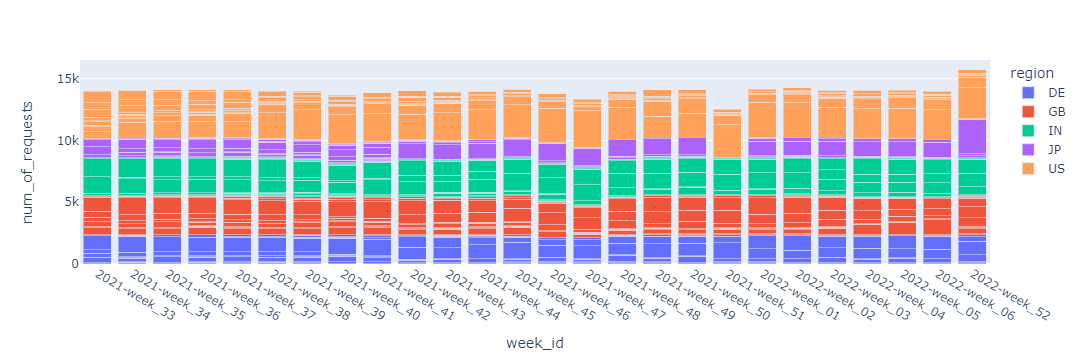

In [96]:
px.bar(df, x='week_id', y='num_of_requests', color='region', hover_data=['requester'], barmode = 'stack')

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [78]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

['2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv',
 '2021_33_GB_Yield_annotation_result.csv',
 '2021_33_GB__Sample.csv',
 '2021_33_IN_Qality_annotation_result.csv',
 '2021_33_IN_Yield_annotation_result.csv',
 '2021_33_IN__Sample.csv',
 '2021_33_JP_Qality_annotation_result.csv']

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

Produce the following requestser proportion graph:

## Appendix

Code to create weekly files:

In [79]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)